In [1]:
import os,sys
import glob
import pandas
from osgeo import gdal
import datetime 
from dateutil import parser
import numpy as np
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt
import matplotlib.patches
%matplotlib  widget

In [2]:
dir = '/data/ocp4/LagunaSalada/Data_and_Figs/cropped_9000_1800_18000_3600/'
igramDir = '/home/ocp4/data/LagunaSalada/Data_and_Figs/cropped_9000_1800_18000_3600/cropped_LS_with_western_mtns/unfilt_unwrapped/'

# load in dates, make sure they are in order
dates = [os.path.basename(x) for x in glob.glob(dir+"SLC_vh/2*")]; dates = sorted(dates)
nd = len(dates); numIgrams = nd-1

# region to read in of SLCs
x1 = 18000; x2 = 14000
y1 = 2100;  y2 = 1000
dx = x1-x2
dy = y1-y2

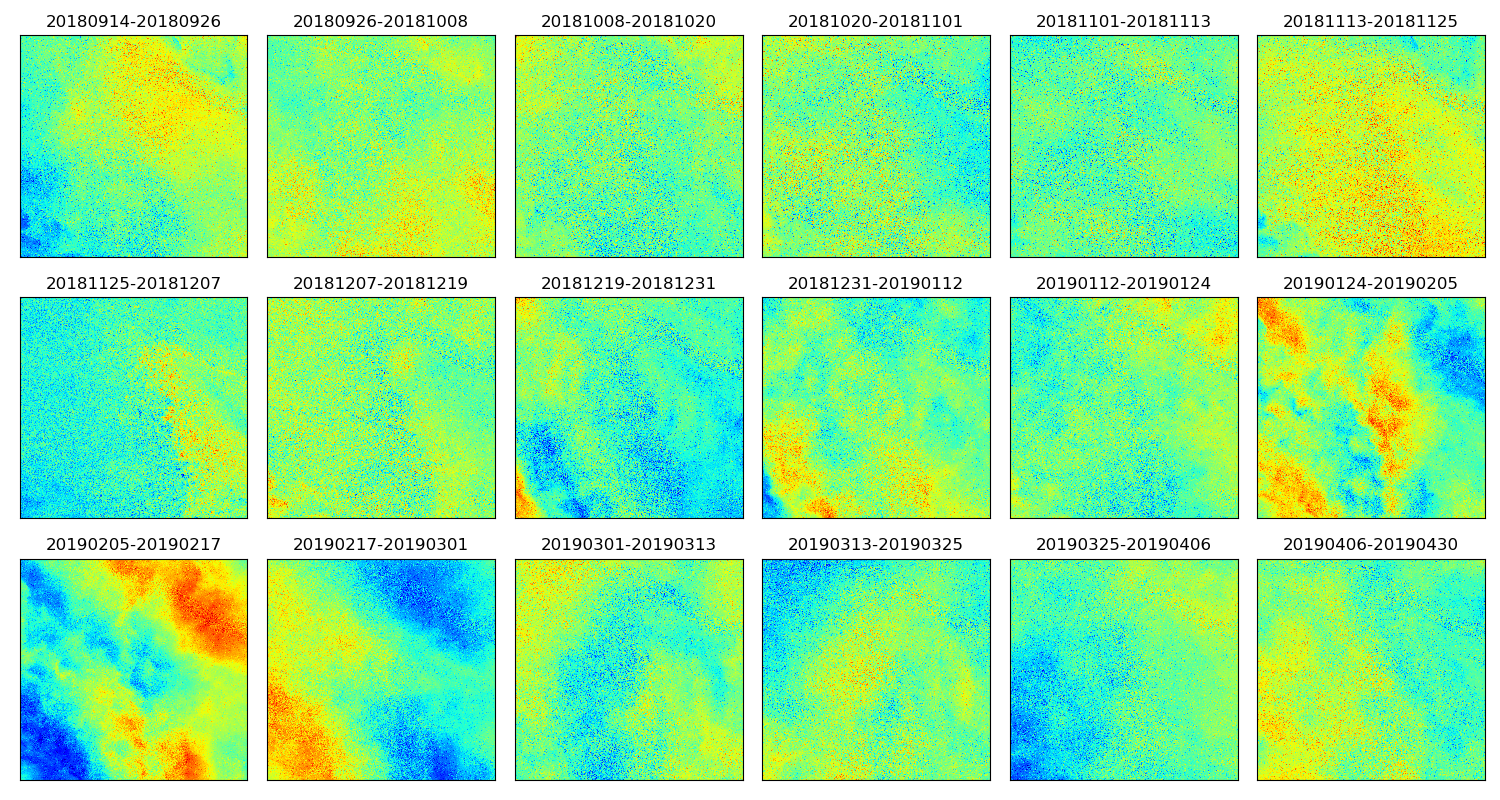

In [3]:
plt.figure(figsize=(15,8),tight_layout=True)

start = 40
count = 1
for i in range(start,start+18,1):
    # load in unwrapped igram
    date1 = dates[i]; date2 = dates[i+1]
    igram = igramDir+str(date1)+'_'+str(date2)+'_unfilt.unw'
    # read in the unw igram
    f1 = gdal.Open(igram, gdal.GA_ReadOnly)
    unw_igram = f1.ReadAsArray()
    f1 = None
    # now plot it as a subplot
    plt.subplot(3,6,count)
    plt.imshow(unw_igram,cmap='jet',aspect='auto',interpolation='None')
    plt.xlim(dx,0); plt.ylim(dy,0)
    plt.title(str(date1)+'-'+str(date2))
    plt.xticks([]); plt.yticks([])
    count = count+1
plt.show()
